Dataset name - Adult Census Income (adult.csv)

Dataset name - Adult Census Income (adult.csv)

Dataset name - Adult Census Income (adult.csv)

In [2]:
#reading the input file (adult.csv)

df = pd.read_csv("adult.csv")

#displaying N rows using head function.
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


3. Pre-Processing of data - replacing '?' with 'NaN'

In [3]:
#Data cleaning - replacing '?' with 'NaN'
df = df.replace('?',np.nan)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


4. Differentiating and storing numnerical and categorical features in list.

In [4]:
#Initializing list for differentiating numerical and categorical features.
numerical_features = []
categorical_features = []

#Categorical Features
categorical_features=df.select_dtypes(include=['object']).columns.tolist()

#Numerical Features
numerical_features=df.select_dtypes(exclude=['object']).columns.tolist()

In [5]:
#displaying numerical and categorical features
print('Numerical features: ', numerical_features)
print('\nCategorical features: ', categorical_features)

Numerical features:  ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

Categorical features:  ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


5. Imputation using mean/mode

In [6]:
#Imputation using mean/mode 
#using mean for numerical features and mode for categorical features

#imputation using mean for numerical features

df.age.fillna(value=df.age.mean(),inplace=True)
df.fnlwgt.fillna(value=df.fnlwgt.mean(),inplace=True)
df['education.num'].fillna(value=df['education.num'].mean(),inplace=True)
df['capital.gain'].fillna(value=df['capital.gain'].mean(),inplace=True)
df['capital.loss'].fillna(value=df['capital.loss'].mean(),inplace=True)
df['hours.per.week'].fillna(value=df['hours.per.week'].mean(),inplace=True)


#imputation using mode for categorical features

df.workclass.fillna(df.workclass.mode()[0],inplace=True)
df.education.fillna(df.education.mode()[0],inplace=True)
df['marital.status'].fillna(df['marital.status'].mode()[0],inplace=True)
df.occupation.fillna(df.occupation.mode()[0],inplace=True)
df.relationship.fillna(df.relationship.mode()[0],inplace=True)
df.race.fillna(df.race.mode()[0],inplace=True)
df.sex.fillna(df.sex.mode()[0],inplace=True)
df['native.country'].fillna(df['native.country'].mode()[0],inplace=True)

6. Plotting the distribution for categorical and numerical features

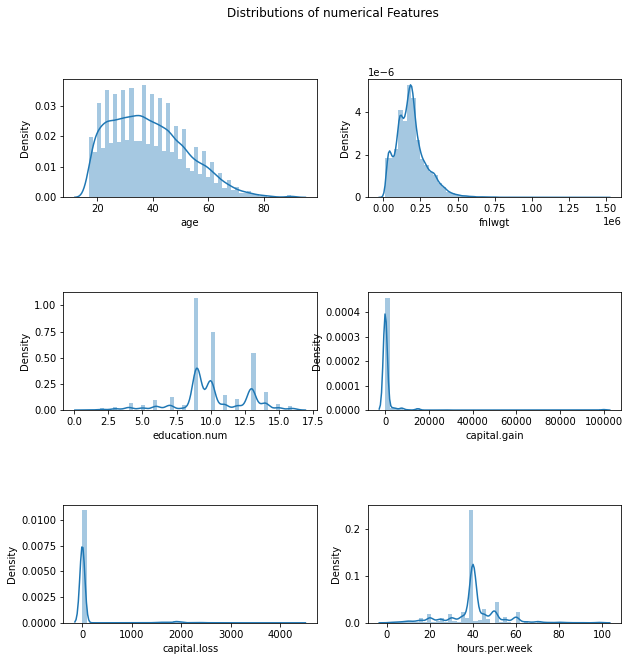

In [7]:
#plotting the distribution plot for all numerical features.

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
fig.subplots_adjust(hspace=0.8)
fig.suptitle('Distributions of numerical Features')

for ax, unique_values in zip(axes.flatten(), numerical_features):
    sns.distplot(a=df[unique_values], ax=ax)

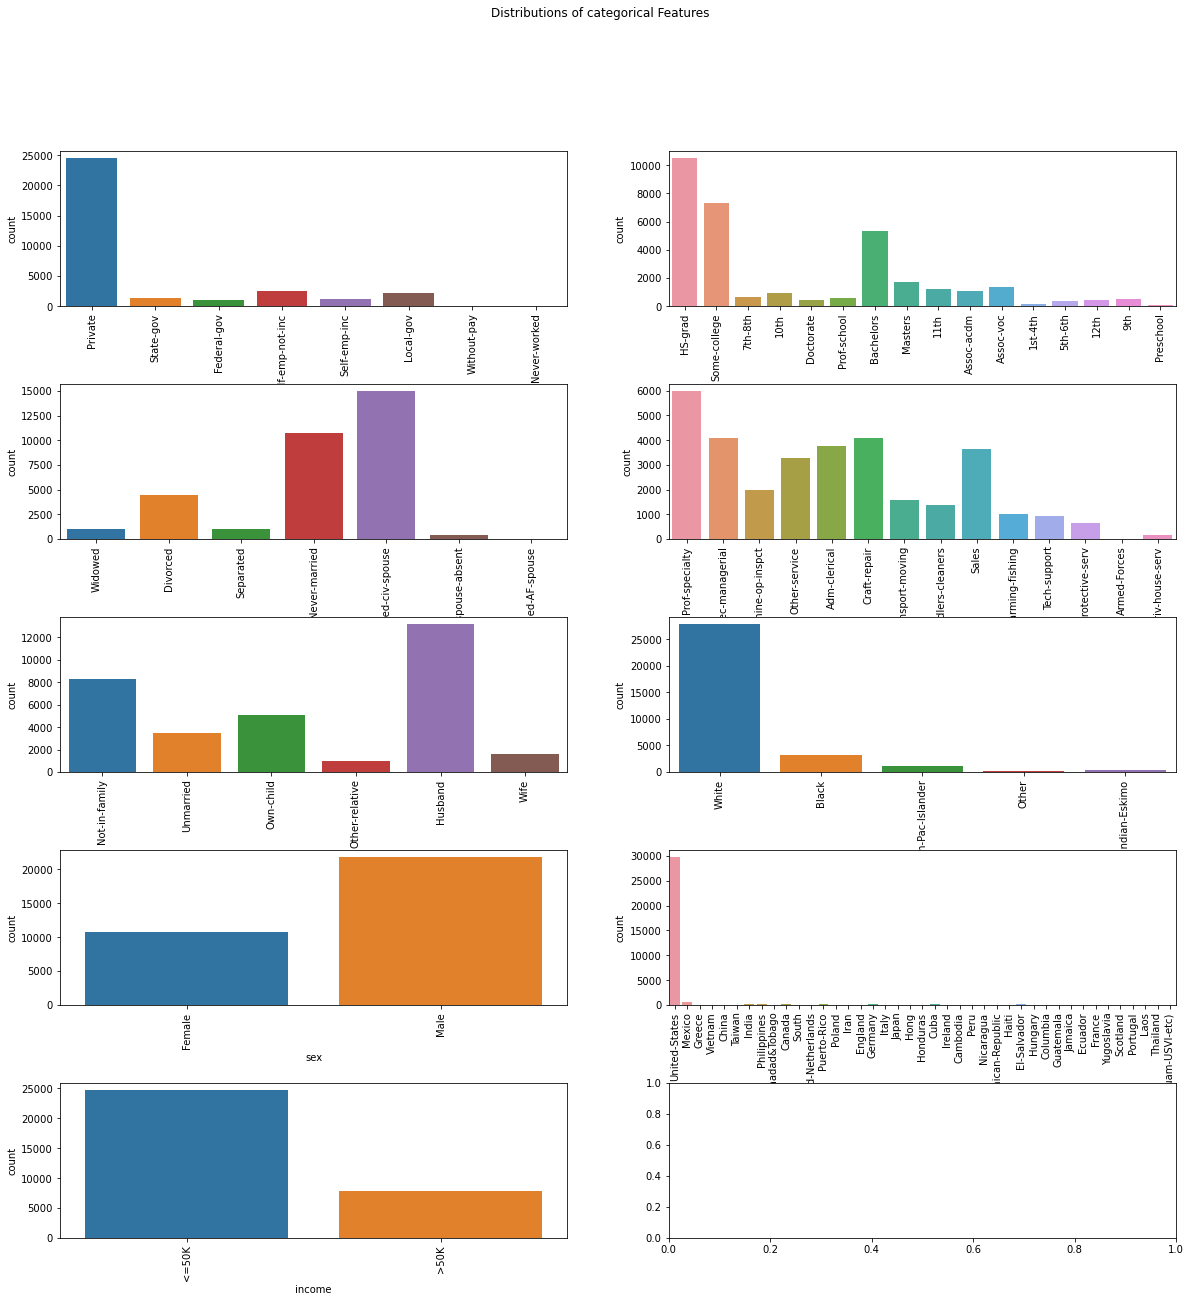

In [8]:
#plotting the count plot for all categorical features.

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20,20))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of categorical Features')
    

for ax, unique_values in zip(axes.flatten(), categorical_features):
    chart = sns.countplot(df[unique_values], ax=ax)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


7. Describing the dataset

In [9]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


8. Data preprocessing for missing values - using LabelEncoder

In [10]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
df.income.describe()

count     32561
unique        2
top       <=50K
freq      24720
Name: income, dtype: object

In [13]:
#Data preprocessing of given data using labelEncoder
label_encoder = preprocessing.LabelEncoder()

df['workclass']= label_encoder.fit_transform(df['workclass'])
df['education']= label_encoder.fit_transform(df['education'])
df['marital.status']= label_encoder.fit_transform(df['marital.status'])
df['occupation']= label_encoder.fit_transform(df['occupation'])
df['relationship']= label_encoder.fit_transform(df['relationship'])
df['race']= label_encoder.fit_transform(df['race'])
df['sex']= label_encoder.fit_transform(df['sex'])
df['native.country']= label_encoder.fit_transform(df['native.country'])
df['income']= label_encoder.fit_transform(df['income'])

In [14]:
#dropping the duplicate records from dataset
df = df.drop_duplicates()

9. Plotting correlation between different features

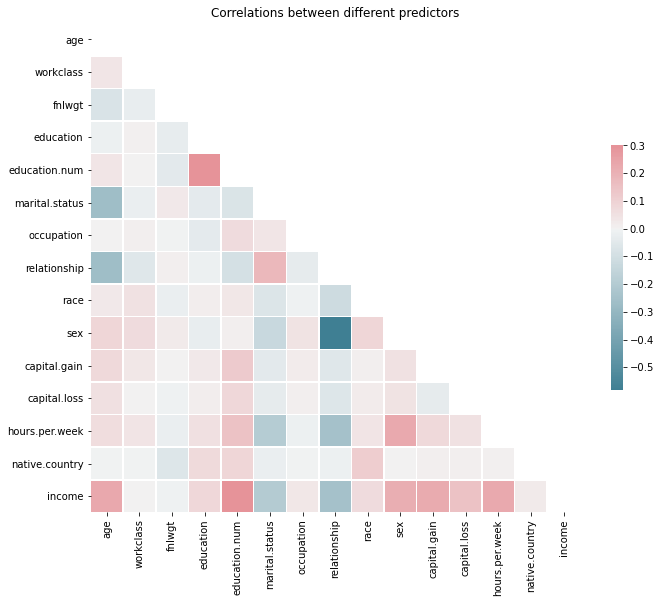

In [15]:
#plotting correlation. 
corr_df = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different predictors')
plt.show()

10. Split the data into training and testing set.

In [16]:
#With sklearn.model_selection.train_test_split you are creating 4 portions of data which will be used for fitting & predicting values.
#X_train, X_test, y_train, y_test

X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1], df['income'], 
                                                    test_size = 0.25, random_state=44,
                                                   stratify= df['income'] )

In [17]:
X_train.shape, X_test.shape

((24402, 14), (8135, 14))

In [18]:
 y_train.shape, y_test.shape

((24402,), (8135,))

In [19]:
# df.to_csv("input_file.csv")

11. MinMaxScalar for numerical features - data preprocessing

In [20]:
#using MinMaxScalar for numerical features - data preprocessing
scaler = MinMaxScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

 12. Build the classifier

In [21]:
#1. GaussianNB
# create an object of the GaussianNB classifier
gaussian = GaussianNB()
# train the classifier
gaussian.fit(X_train, y_train)
print('Building GaussianNB classifer : ',gaussian)

# 2. MultinomialNB
# create an object of the Multinomial classifier
multinomial = MultinomialNB()
# train the classifier
multinomial.fit(X_train, y_train)
print('Building MultinomialNB classifer : ',multinomial)


#3. BurnolliNB  
# create an object of the BurnolliNB classifier
bernoulli = BernoulliNB(binarize=0.0)
# train the classifier
bernoulli.fit(X_train, y_train)
print('Building BurnolliNB classifer : ',bernoulli)


Building GaussianNB classifer :  GaussianNB()
Building MultinomialNB classifer :  MultinomialNB()
Building BurnolliNB classifer :  BernoulliNB()


13. Make predictions for training and test data

In [22]:
#1. GaussianNB

#for X_test data 
pred_for_gaussianNB_test = gaussian.predict(X_test)
#for X_train data 
pred_for_gaussianNB_train = gaussian.predict(X_train)

#2. MultinomialNB
#for X_test data 
pred_for_multinomialNB_test = multinomial.predict(X_test) 


#3. BurnolliNB
#for X_test data 
pred_for_burnolliNB_test = bernoulli.predict(X_test)



14. Performance Measures

In [23]:
#display accuracy 

#1. GaussianNB
print('For GaussianNB :')
print('Accuracy Score:',metrics.accuracy_score(y_test, pred_for_gaussianNB_test)*100)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_for_gaussianNB_test))

#2. MultinomialNB
print('\nMultinomialNB')
print('Accuracy Score:',metrics.accuracy_score(y_test, pred_for_multinomialNB_test)*100)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_for_multinomialNB_test))

#3. BurnolliNB
print('\nBurnolliNB')
print('Accuracy Score:',metrics.accuracy_score(y_test, pred_for_burnolliNB_test)*100)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_for_burnolliNB_test))


For GaussianNB :
Accuracy Score: 80.45482483097726
Confusion Matrix:
 [[5857  318]
 [1272  688]]

MultinomialNB
Accuracy Score: 77.7258758451137
Confusion Matrix:
 [[5328  847]
 [ 965  995]]

BurnolliNB
Accuracy Score: 73.00553165334972
Confusion Matrix:
 [[4524 1651]
 [ 545 1415]]


15. Visualizing training and test results of all models

In [24]:
#function for decision boundary and plot_graph
def decision_boundary(x_1):
    """ Calculates the x_2 value for plotting the decision boundary."""
    return 4 - np.sqrt(-x_1**2 + 4*x_1 + 6 + np.log(16))

def plot_graph(sample1,sample2):
    # Main scatter plot and plot annotation
    f, ax = plt.subplots(figsize=(7, 7))
    ax.scatter(sample1.to_numpy()[:,0], sample1.to_numpy()[:,-1], marker='o', color='green', s=40, alpha=0.5)
    ax.scatter(sample2.to_numpy()[:,0], sample2.to_numpy()[:,-1], marker='^', color='blue', s=40, alpha=0.5)
    plt.legend(['Class1 (w1)', 'Class2 (w2)'], loc='upper right') 
    plt.title('Densities of 2 classes with 25 bivariate random patterns each')
    plt.ylabel('x2')
    plt.xlabel('x1')
    ftext = 'p(x|w1) ~ N(mu1=(0,0)^t, cov1=I)\np(x|w2) ~ N(mu2=(1,1)^t, cov2=I)'
    plt.figtext(.15,.8, ftext, fontsize=11, ha='left')

    # Adding decision boundary to plot
    x_1 = np.arange(-5, 5, 0.1)
    bound = decision_boundary(x_1)
    plt.plot(x_1, bound, 'r--', lw=3)

    x_vec = np.linspace(*ax.get_xlim())
    x_1 = np.arange(0, 100, 0.05)

    plt.show()

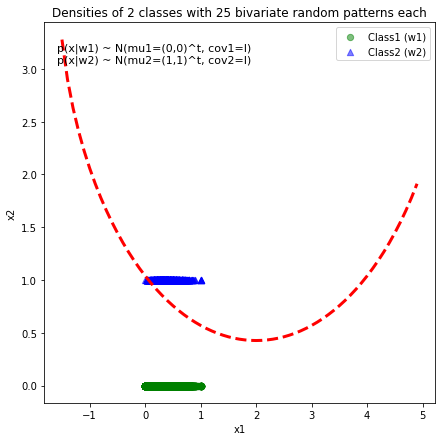

In [25]:
#plotting decision boundary graph for X_train GaussianNB 
sample_gaussianNB_train = X_train.copy()
sample_gaussianNB_train['predicted_val'] = pred_for_gaussianNB_train
sample_gaussianNB_train1 = sample_gaussianNB_train[sample_gaussianNB_train['predicted_val']==0]
sample_gaussianNB_train2 = sample_gaussianNB_train[sample_gaussianNB_train['predicted_val']==1]

plot_graph(sample_gaussianNB_train1,sample_gaussianNB_train2)

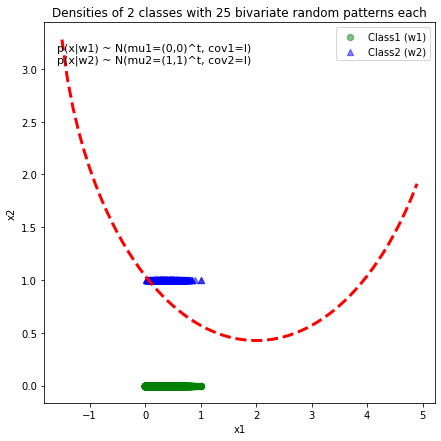

In [26]:
#1. GaussianNB

#plotting decision boundary graph for X_test GaussianNB 
sample_gaussianNB_test = X_test.copy()
sample_gaussianNB_test['predicted_val'] = pred_for_gaussianNB_test
sample_gaussianNB_test1 = sample_gaussianNB_test[sample_gaussianNB_test['predicted_val']==0]
sample_gaussianNB_test2 = sample_gaussianNB_test[sample_gaussianNB_test['predicted_val']==1]

plot_graph(sample_gaussianNB_test1,sample_gaussianNB_test2)

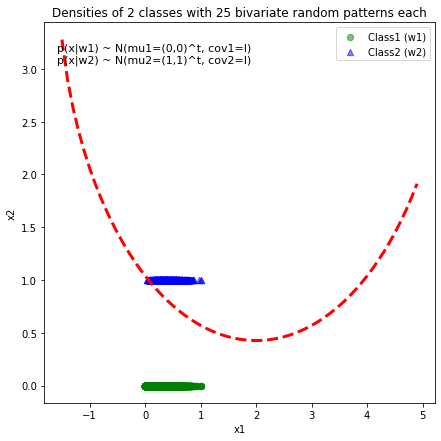

In [27]:
#2. MultinomialNB

#plotting decision boundary graph for X_test MultinomialNB 
sample_multinomialNB_test = X_test.copy()
sample_multinomialNB_test['predicted_val'] = pred_for_multinomialNB_test
sample_multinomialNB_test1 = sample_multinomialNB_test[sample_multinomialNB_test['predicted_val']==0]
sample_multinomialNB_test2 = sample_multinomialNB_test[sample_multinomialNB_test['predicted_val']==1]

plot_graph(sample_multinomialNB_test1,sample_multinomialNB_test2)

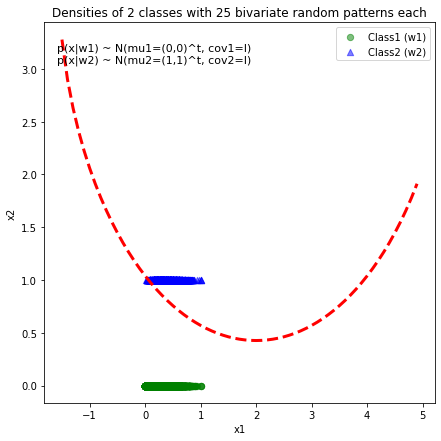

In [28]:
#3. BurnolliNB

#plotting decision boundary graph for X_test BurnolliNB

sample_burnolliNB_test = X_test.copy()
sample_burnolliNB_test['predicted_val'] = pred_for_burnolliNB_test
sample_burnolliNB_test1 = sample_burnolliNB_test[sample_burnolliNB_test['predicted_val']==0]
sample_burnolliNB_test2 = sample_burnolliNB_test[sample_burnolliNB_test['predicted_val']==1]

plot_graph(sample_burnolliNB_test1,sample_burnolliNB_test2)

16. Displaying the output in output.csv

In [29]:
output = pd.DataFrame({'Actual': y_test,
           'Predicted for GuassianNB': pred_for_gaussianNB_test,
            'Predicted for MultinomialNB':pred_for_multinomialNB_test,
            'Predicted for BurnolliNB': pred_for_burnolliNB_test})
output.head()
output.to_csv("output.csv")